<a href="https://colab.research.google.com/github/Shaggstar/Object-Myths/blob/main/Sim_V0_Myth_of_Objectivity_Intimates_%3ETags_%3EInsignia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a simulation that illustrates the **myth of objectivity hypothesis (MOH)**, the claim that humanity's symbolic cogntive modeling ability is connected to morality and cultural identification. The goal here is to illustrate the evolutionary emphasis, that given the backgdrop of anonymous tag-based social units (accent bias), morality emerged to allow us to code belief in a shared social unit by first creating comparing two candidate Self models, one aligned to cultural expectations and one narrower.

This is what is called **conceptual model diveregence (CMD)** - a practice that represents metaphoric language processing in a novel treatment of Actrive Inference. Whereas coding specific norms was a versin of **explicit error modeling (EOM)**. The simulation below aims to evaluate the stability and increase in social size that first tag based cooperation would allow, and secondly to demonstrate the stability and arbitrarily high social units a codified morality allows.

For details the formality see here:
- [Symbols: Errors from Above](https://shaggy.substack.com/p/symbols-errors-from-above)
- [In the Beginning, the Word was Free (energy)](https://shaggy.substack.com/p/in-the-beginning-the-word-was-free)

For the original theory see here:
- [Frontiers Paper: Myth of Objectivity & Origins of Symbols](https://www.frontiersin.org/articles/10.3389/fsoc.2023.1269621/abstract)

Contact:
Shagor Rahman
Shagor.a.rahman@gmail.com

In [ ]:
! pip install inferactively-pymdp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.4 MB/s eta 0:00:00


# 1. Library Import and Set up

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.animation import FuncAnimation

# Try to import pymdp for KL divergence calculation
try:
    from pymdp import utils
    pymdp_available = True
    print("PyMDP library available - will use for KL divergence calculations")
except ImportError:
    pymdp_available = False
    print("PyMDP library not available - will use simplified KL divergence")

# Define parameters
num_agents = 100  # Total number of agents
num_iterations = 200  # Number of time steps
cooperation_benefit = 2.0  # Benefit received from cooperation
defection_cost = 1.0  # Cost suffered when partner defects
learning_rate = 0.05  # How quickly agents update their beliefs
exploration_rate = 0.1  # Probability of random exploration

# Cognitive limits for each model type
cognitive_limits = {
    'intimate': 10,    # Intimate model: can only track ~10 individuals
    'tag': 30,         # Tag-based model: can track ~30 individuals via tags
    'cultural': float('inf')  # Cultural model: unlimited via shared norms
}

PyMDP library available - will use for KL divergence calculations


# 2. Helper Functions **Section**

In [ ]:
# Function to calculate conceptual model divergence
def calculate_cmd(agent, observed_cultural_rate):
    """Calculate KL divergence between personal and cultural models"""
    if pymdp_available:
        # Create probability distributions over cooperation (yes/no)
        personal_dist = np.array([1-agent.personal_model, agent.personal_model])
        cultural_dist = np.array([1-observed_cultural_rate, observed_cultural_rate])

        # Ensure valid probability distributions (avoid zeros)
        personal_dist = np.clip(personal_dist, 0.01, 0.99)
        personal_dist = personal_dist / personal_dist.sum()

        cultural_dist = np.clip(cultural_dist, 0.01, 0.99)
        cultural_dist = cultural_dist / cultural_dist.sum()

        # Manual KL divergence calculation
        kl_div = np.sum(personal_dist * np.log(personal_dist / cultural_dist))
        return kl_div
    else:
        # Fallback to simplified calculation
        return abs(agent.personal_model - observed_cultural_rate)

# 3. Agent Class Section

In [ ]:
# Define agent classes for each model type
class IntimateAgent:
    def __init__(self, agent_id):
        self.id = agent_id
        self.known_agents = {}  # {agent_id: cooperation_probability}
        self.fitness = 0
        self.interactions = []

    def decide_action(self, partner_id):
        # Cooperate with known partners who are likely to cooperate
        if partner_id in self.known_agents:
            if np.random.random() < exploration_rate:
                return np.random.choice([0, 1])  # Random exploration
            return 1 if self.known_agents[partner_id] > 0.5 else 0
        # Default to defection with unknown partners
        return 0

    def update_beliefs(self, partner_id, partner_action):
        # Update beliefs about specific partner
        if partner_id not in self.known_agents:
            # Initialize with neutral belief for new partners
            self.known_agents[partner_id] = 0.5

        # Update belief using prediction error (Explicit Error Modeling)
        prediction_error = partner_action - self.known_agents[partner_id]
        self.known_agents[partner_id] += learning_rate * prediction_error

        # If known agents exceed cognitive capacity, forget the least frequently encountered
        if len(self.known_agents) > cognitive_limits['intimate']:
            interaction_counts = {aid: 0 for aid in self.known_agents}
            for p_id, _ in self.interactions[-100:]:  # Count recent interactions
                if p_id in interaction_counts:
                    interaction_counts[p_id] += 1

            # Remove least frequent
            min_agent = min(interaction_counts, key=interaction_counts.get)
            del self.known_agents[min_agent]

    def update_fitness(self, my_action, partner_action):
        # Calculate payoff
        payoff = 0
        if my_action == 1:  # I cooperated
            payoff -= 1  # Base cost of cooperation
            if partner_action == 1:  # Partner cooperated
                payoff += cooperation_benefit
        if partner_action == 0:  # Partner defected
            payoff -= defection_cost

        self.fitness += payoff

class TagAgent:
    def __init__(self, agent_id):
        self.id = agent_id
        self.tag = np.random.randint(0, 5)  # 5 possible tags
        self.tag_beliefs = {t: 0.5 for t in range(5)}  # {tag: cooperation_probability}
        self.fitness = 0
        self.interactions = []

    def decide_action(self, partner_tag):
        # Cooperate based on tag reputation
        if np.random.random() < exploration_rate:
            return np.random.choice([0, 1])  # Random exploration
        return 1 if self.tag_beliefs[partner_tag] > 0.5 else 0

    def update_beliefs(self, partner_tag, partner_action):
        # Update beliefs about this tag using prediction error
        prediction_error = partner_action - self.tag_beliefs[partner_tag]
        self.tag_beliefs[partner_tag] += learning_rate * prediction_error

    def update_fitness(self, my_action, partner_action):
        # Calculate payoff
        payoff = 0
        if my_action == 1:  # I cooperated
            payoff -= 1  # Base cost of cooperation
            if partner_action == 1:  # Partner cooperated
                payoff += cooperation_benefit
        if partner_action == 0:  # Partner defected
            payoff -= defection_cost

        self.fitness += payoff

class CulturalAgent:
    def __init__(self, agent_id):
        self.id = agent_id
        self.tag = np.random.randint(0, 5)  # 5 possible tags
        self.cultural_belief = 0.5  # Belief about general cooperation level in culture
        self.norm_adherence = np.random.beta(5, 2)  # How much agent adheres to cultural norms
        self.fitness = 0
        self.interactions = []

        # For CMD (Conceptual Model Divergence)
        self.personal_model = 0.5  # Personal expectation of cooperation

    def decide_action(self, partner_id):
        # Random exploration
        if np.random.random() < exploration_rate:
            return np.random.choice([0, 1])

        # Decision combines cultural norms with personal model
        # This represents toggling between models (personal vs cultural)
        personal_weight = 1 - self.norm_adherence
        cultural_weight = self.norm_adherence

        cooperation_prob = (personal_weight * self.personal_model +
                           cultural_weight * self.cultural_belief)

        return 1 if cooperation_prob > 0.5 else 0

    def update_beliefs(self, observed_actions):
        # Calculate cultural prediction error (average cooperation rate)
        cultural_error = np.mean(observed_actions) - self.cultural_belief
        self.cultural_belief += learning_rate * cultural_error

        # Update personal model based on recent experiences
        if len(self.interactions) > 0:
            recent_outcomes = [action for _, action in self.interactions[-10:]]
            if recent_outcomes:
                personal_error = np.mean(recent_outcomes) - self.personal_model
                self.personal_model += learning_rate * 2 * personal_error  # Faster personal updates

    def update_fitness(self, my_action, partner_action):
        # Calculate payoff
        payoff = 0
        if my_action == 1:  # I cooperated
            payoff -= 1  # Base cost of cooperation
            if partner_action == 1:  # Partner cooperated
                payoff += cooperation_benefit
        if partner_action == 0:  # Partner defected
            payoff -= defection_cost

        self.fitness += payoff

        # Record interaction
        self.interactions.append((partner_action, my_action))
        if len(self.interactions) > 100:
            self.interactions.pop(0)

# 4. Sim Func Sections

In [ ]:
# Simulation function with improved interactions
def run_simulation():
    print("Initializing agents...")
    # Create agents of each type
    intimate_agents = [IntimateAgent(i) for i in range(num_agents)]
    tag_agents = [TagAgent(i) for i in range(num_agents)]
    cultural_agents = [CulturalAgent(i) for i in range(num_agents)]

    # Data collection
    results = {
        'intimate': {'avg_fitness': [], 'cooperation_rate': [], 'computational_load': []},
        'tag': {'avg_fitness': [], 'cooperation_rate': [], 'computational_load': []},
        'cultural': {'avg_fitness': [], 'cooperation_rate': [], 'cmd': []}
    }

    print(f"Starting {num_iterations} iterations...")
    for iteration in range(num_iterations):
        if iteration % 10 == 0:
            print(f"Running iteration {iteration}...")

        # INTIMATE MODEL SIMULATION
        interactions = 0
        cooperations = 0

        # Each agent interacts with 3 random partners
        interactions_per_agent = 3

        for agent1_idx in range(num_agents):
            # Select random partners that aren't self
            potential_partners = [i for i in range(num_agents) if i != agent1_idx]
            partner_indices = np.random.choice(potential_partners,
                                              size=min(interactions_per_agent, len(potential_partners)),
                                              replace=False)

            for agent2_idx in partner_indices:
                agent1 = intimate_agents[agent1_idx]
                agent2 = intimate_agents[agent2_idx]

                # Decide actions
                action1 = agent1.decide_action(agent2.id)
                action2 = agent2.decide_action(agent1.id)

                # Update beliefs and fitness
                agent1.update_beliefs(agent2.id, action2)
                agent2.update_beliefs(agent1.id, action1)
                agent1.update_fitness(action1, action2)
                agent2.update_fitness(action2, action1)

                # Track cooperation
                interactions += 2
                cooperations += action1 + action2

                # Record interactions
                agent1.interactions.append((agent2.id, action2))
                agent2.interactions.append((agent1.id, action1))

                # Limit interaction history
                if len(agent1.interactions) > 100:
                    agent1.interactions.pop(0)
                if len(agent2.interactions) > 100:
                    agent2.interactions.pop(0)

        # Calculate average computational load
        comp_load = np.mean([len(a.known_agents) for a in intimate_agents])

        # Record results
        results['intimate']['avg_fitness'].append(np.mean([a.fitness for a in intimate_agents]))
        results['intimate']['cooperation_rate'].append(cooperations / interactions if interactions > 0 else 0)
        results['intimate']['computational_load'].append(comp_load)

        # TAG-BASED MODEL SIMULATION
        interactions = 0
        cooperations = 0

        # Each agent interacts with 3 random partners
        for agent1_idx in range(num_agents):
            # Select random partners that aren't self
            potential_partners = [i for i in range(num_agents) if i != agent1_idx]
            partner_indices = np.random.choice(potential_partners,
                                              size=min(interactions_per_agent, len(potential_partners)),
                                              replace=False)

            for agent2_idx in partner_indices:
                agent1 = tag_agents[agent1_idx]
                agent2 = tag_agents[agent2_idx]

                # Decide actions based on partner's tag
                action1 = agent1.decide_action(agent2.tag)
                action2 = agent2.decide_action(agent1.tag)

                # Update beliefs and fitness
                agent1.update_beliefs(agent2.tag, action2)
                agent2.update_beliefs(agent1.tag, action1)
                agent1.update_fitness(action1, action2)
                agent2.update_fitness(action2, action1)

                # Track cooperation
                interactions += 2
                cooperations += action1 + action2

                # Record interactions
                agent1.interactions.append((agent2.tag, action2))
                agent2.interactions.append((agent1.tag, action1))

                # Limit interaction history
                if len(agent1.interactions) > 100:
                    agent1.interactions.pop(0)
                if len(agent2.interactions) > 100:
                    agent2.interactions.pop(0)

        # Record results
        results['tag']['avg_fitness'].append(np.mean([a.fitness for a in tag_agents]))
        results['tag']['cooperation_rate'].append(cooperations / interactions if interactions > 0 else 0)
        results['tag']['computational_load'].append(5)  # Fixed at number of tags

        # CULTURAL MODEL SIMULATION
        interactions = 0
        cooperations = 0
        all_actions = []

        # Cultural agents can interact with more partners - demonstration of scalability
        cultural_interactions_per_agent = 5  # Cultural agents handle more interactions

        for agent1_idx in range(num_agents):
            # Select random partners that aren't self
            potential_partners = [i for i in range(num_agents) if i != agent1_idx]
            partner_indices = np.random.choice(potential_partners,
                                              size=min(cultural_interactions_per_agent, len(potential_partners)),
                                              replace=False)

            for agent2_idx in partner_indices:
                agent1 = cultural_agents[agent1_idx]
                agent2 = cultural_agents[agent2_idx]

                # Decide actions
                action1 = agent1.decide_action(agent2.id)
                action2 = agent2.decide_action(agent1.id)

                # Update fitness
                agent1.update_fitness(action1, action2)
                agent2.update_fitness(action2, action1)

                # Track cooperation and actions
                interactions += 2
                cooperations += action1 + action2
                all_actions.extend([action1, action2])

        # Update cultural beliefs based on observed actions
        for agent in cultural_agents:
            agent.update_beliefs(all_actions)

        # Calculate average CMD
        cultural_rate = np.mean(all_actions)
        avg_cmd = np.mean([calculate_cmd(agent, cultural_rate) for agent in cultural_agents])

        # Record results
        results['cultural']['avg_fitness'].append(np.mean([a.fitness for a in cultural_agents]))
        results['cultural']['cooperation_rate'].append(cooperations / interactions if interactions > 0 else 0)
        results['cultural']['cmd'].append(avg_cmd)

        # Print summary periodically
        if iteration % 10 == 0:
            print(f"Iteration {iteration} summary:")
            print(f"  Intimate model: coop_rate={results['intimate']['cooperation_rate'][-1]:.2f}, fitness={results['intimate']['avg_fitness'][-1]:.2f}")
            print(f"  Tag model: coop_rate={results['tag']['cooperation_rate'][-1]:.2f}, fitness={results['tag']['avg_fitness'][-1]:.2f}")
            print(f"  Cultural model: coop_rate={results['cultural']['cooperation_rate'][-1]:.2f}, fitness={results['cultural']['avg_fitness'][-1]:.2f}")

    print("Simulation complete.")
    return results

# 5. Run Sim and Viz

Starting simulation...
Initializing agents...
Starting 200 iterations...
Running iteration 0...
Iteration 0 summary:
  Intimate model: coop_rate=0.00, fitness=-6.00
  Tag model: coop_rate=0.09, fitness=-5.88
  Cultural model: coop_rate=0.05, fitness=-10.00
Running iteration 10...
Iteration 10 summary:
  Intimate model: coop_rate=0.01, fitness=-66.00
  Tag model: coop_rate=0.04, fitness=-65.24
  Cultural model: coop_rate=0.04, fitness=-109.52
Running iteration 20...
Iteration 20 summary:
  Intimate model: coop_rate=0.01, fitness=-125.96
  Tag model: coop_rate=0.05, fitness=-125.12
  Cultural model: coop_rate=0.04, fitness=-209.08
Running iteration 30...
Iteration 30 summary:
  Intimate model: coop_rate=0.01, fitness=-185.88
  Tag model: coop_rate=0.06, fitness=-184.84
  Cultural model: coop_rate=0.04, fitness=-308.56
Running iteration 40...
Iteration 40 summary:
  Intimate model: coop_rate=0.01, fitness=-245.88
  Tag model: coop_rate=0.05, fitness=-244.48
  Cultural model: coop_rate=0.0

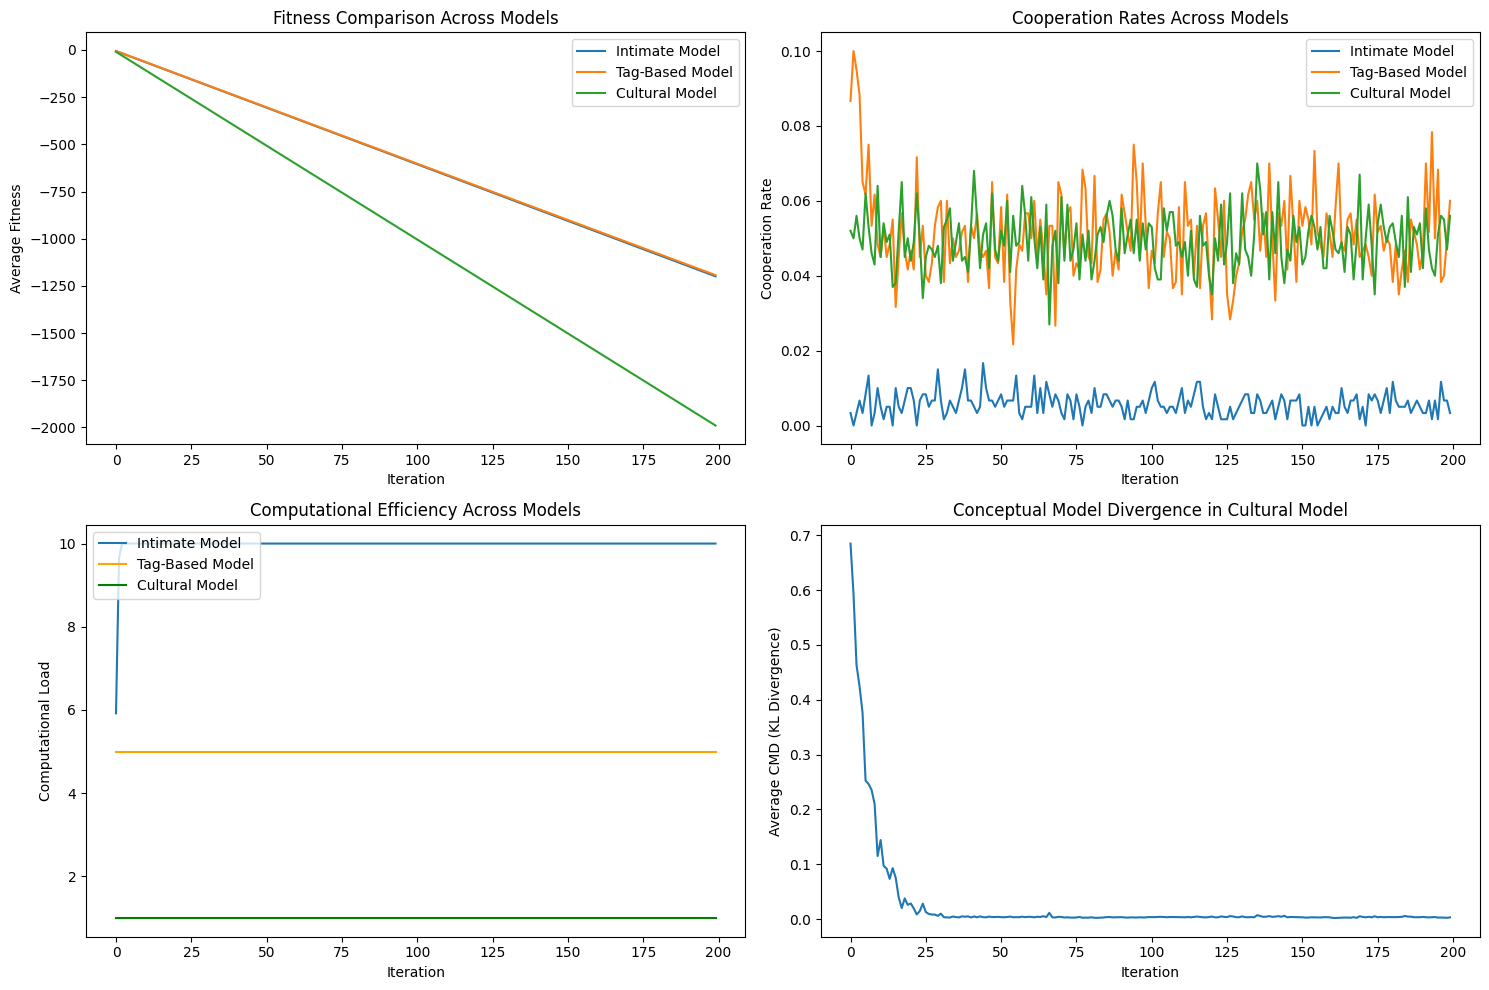

Results visualization complete.


In [ ]:
# Run simulation
print("Starting simulation...")
results = run_simulation()
print("Plotting results...")

# Create simple four-panel visualization
plt.figure(figsize=(15, 10))

# Fitness comparison
plt.subplot(2, 2, 1)
plt.plot(results['intimate']['avg_fitness'], label='Intimate Model')
plt.plot(results['tag']['avg_fitness'], label='Tag-Based Model')
plt.plot(results['cultural']['avg_fitness'], label='Cultural Model')
plt.xlabel('Iteration')
plt.ylabel('Average Fitness')
plt.title('Fitness Comparison Across Models')
plt.legend()

# Cooperation rates
plt.subplot(2, 2, 2)
plt.plot(results['intimate']['cooperation_rate'], label='Intimate Model')
plt.plot(results['tag']['cooperation_rate'], label='Tag-Based Model')
plt.plot(results['cultural']['cooperation_rate'], label='Cultural Model')
plt.xlabel('Iteration')
plt.ylabel('Cooperation Rate')
plt.title('Cooperation Rates Across Models')
plt.legend()

# Computational load comparison
plt.subplot(2, 2, 3)
plt.plot(results['intimate']['computational_load'], label='Intimate Model')
plt.plot([5] * len(results['intimate']['computational_load']), 'orange', label='Tag-Based Model')
plt.plot([1] * len(results['intimate']['computational_load']), 'g-', label='Cultural Model')
plt.xlabel('Iteration')
plt.ylabel('Computational Load')
plt.title('Computational Efficiency Across Models')
plt.legend()

# Conceptual Model Divergence for Cultural Model
plt.subplot(2, 2, 4)
plt.plot(results['cultural']['cmd'])
plt.xlabel('Iteration')
plt.ylabel('Average CMD (KL Divergence)')
plt.title('Conceptual Model Divergence in Cultural Model')

plt.tight_layout()
plt.savefig('moh_simulation.png', dpi=300)
plt.show()
print("Results visualization complete.")